In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_data_path = "C:/Users/nandi/Desktop/tensorflow/model_leaf/maize dataset/train"
validation_data_path = "C:/Users/nandi/Desktop/tensorflow/model_leaf/maize dataset/val"

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 339s 4us/step


In [7]:
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob('C:/Users/nandi/Desktop/tensorflow/model_leaf/maize dataset/train/*')

In [9]:
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_data_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2509 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory(validation_data_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 94 images belonging to 4 classes.


In [16]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\nandi\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
79/79 [==============================] - 158s 2s/step - loss: 4.1436 - accuracy: 0.3397 - val_loss: 1.0205 - val_accuracy: 0.6702
Epoch 2/20
79/79 [==============================] - 155s 2s/step - loss: 1.1181 - accuracy: 0.5192 - val_loss: 1.0472 - val_accuracy: 0.5638
Epoch 3/20
79/79 [==============================] - 156s 2s/step - loss: 0.9814 - accuracy: 0.5883 - val_loss: 0.7924 - val_accuracy: 0.7979
Epoch 4/20
79/79 [==============================] - 159s 2s/step - loss: 0.9724 - accuracy: 0.6011 - val_loss: 0.8071 - val_accuracy: 0.6809
Epoch 5/20
79/79 [==============================] - 162s 2s/step - loss: 0.8460 - accuracy: 0.6561 - val_loss: 0.9215 - val_accuracy: 0.7021
Epoch 6/20
79/79 [==============================] - 165s 2s/step - loss: 0.7839 - accuracy: 0.6807 - val_loss: 0.7658 - val_accuracy: 0.7660
Epoch 7/20
79/79 [==============================] - 162s 2s/step - loss: 0.8488 - accuracy: 0.6390 - val_loss: 0.6902 - val_accuracy: 0.7021
Epoch 8/20
79

In [17]:
import matplotlib.pyplot as plt

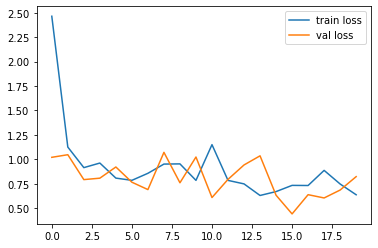

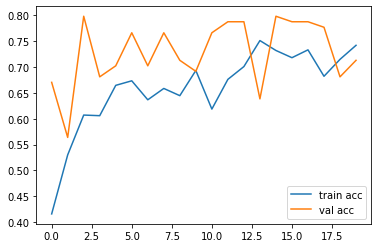

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')
img=image.load_img('Corn_Health (31).jpg',target_size=(224,224))

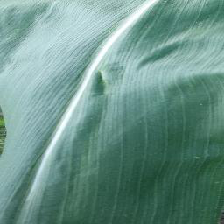

In [41]:
img

In [42]:
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)

In [43]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
print(preds)

[3]
